In [ ]:
STATUS:
    
- I think recording is working ok now. Need to check. 
- Try averaging and looking at evoked response for original (standard vs. deviant) and alternative condition chunking
- etc etc. 

# Auditory oddball ERP experiment with pre-defined trial structure

In [1]:
# go up one folder to main notebooks folder

## Setup

In [2]:
from muselsl import stream, list_muses, view, record
from multiprocessing import Process
from mne import Epochs, find_events
from time import time, strftime, gmtime
import os

from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

from scipy.io import loadmat


from psychopy import prefs
#prefs.hardware['audioLib'] = ['PTB']
#prefs.hardware['audioLib'] = ['pyo'] # PTB']

from eegnb.experiments.auditory_oddball import auditory_erp_arrayin
from eegnb.analysis import utils

import numpy as np, pandas as pd
import h5py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


Load in trial structure

In [3]:
conditions_file = 'MUSE_conditions.mat'

F = h5py.File(conditions_file, 'r')#['museEEG']
highPE = np.squeeze(F['museEEG']['design']['highPE'][:]).astype(int)
lowPE = np.squeeze(F['museEEG']['design']['lowPE'][:]).astype(int)
inputs = np.squeeze(F['museEEG']['design']['inputs'][:]).astype(int)
oddball = np.squeeze(F['museEEG']['design']['oddball'][:]).astype(int)
oddball-=1 

stim_types = oddball
itis = np.ones_like(oddball)*0.5 

In [4]:
# number of trials
itis.shape

(1800,)

In [5]:
# Total duration
itis.sum()/60.

15.0

In [6]:
#dm_file = 'designMatrix.mat'
#dm = loadmat(dm_file)['designMatrix'].T
#stim_types = dm[:,0].astype(int)-1
#stim_types
#itis = dm[:,2] * 0.001
#itis

In [7]:
additional_labels = {'lowPE': lowPE, 'highPE': highPE}

Test run of stimulus delivery

In [8]:
trialses = auditory_erp_arrayin.present(duration=10,stim_types=stim_types,itis=itis,
                                        additional_labels = {'lowPE': lowPE, 'highPE': highPE})

21.1809 	WARNING 	We strongly recommend you activate the PTB sound engine in PsychoPy prefs as the preferred audio engine. Its timing is vastly superior. Your prefs are currently set to use ['sounddevice', 'PTB', 'pyo', 'pygame'] (in that order).
36.7590 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1366, 768]. Using actual size
43.0253 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead


In [9]:
trialses

,sound_ind,iti,lowPE,highPE
0,1,0.5,0,0
1,1,0.5,0,0
2,0,0.5,0,0
3,1,0.5,0,0
4,1,0.5,0,0
...,...,...,...,...
1795,0,0.5,1,0
1796,0,0.5,1,0
1797,0,0.5,1,0
1798,0,0.5,1,0


## Collect EEG data

In [11]:
# Define these parameters 
duration = 30 #30 # 9999 #60 # 99999 # 60 # 120 # in seconds. 120 is recommended
subject = 1 # unique id for each participant
session = 1 # represents a data collection session. Multiple trials can be performed for each session

Seat the subject in front of the computer and run the following cell to run a single trial of the experiment.

In order to maximise the possibility of success, participants should take the experiment in a quiet environment and do their best to minimize movement that might contaminate the signal. With their jaw and face relaxed, subjects should focus on the stimuli, mentally noting whether they see a "face" or a "house".

Data will be recorded into CSV files in the `eeg-notebooks/data` directory

In [28]:
eegnb_data_dir = "C:\\Users\\john_griffiths\\Google Drive\\Work\\Sciencing\\Data\\eeg-notebooks_data"
output_dir = os.path.join(eegnb_data_dir, "auditory-oddball_diaconescu", "jg")

recording_path = os.path.join(output_dir, "subject" + str(subject), "session" + str(session),
                              ("recording_%s.csv" % strftime("%Y-%m-%d-%H.%M.%S", gmtime())))
print('Recording data to: ', recording_path)


Recording data to:  C:\Users\john_griffiths\Google Drive\Work\Sciencing\Data\eeg-notebooks_data\auditory-oddball_diaconescu\jg\subject1\session1\recording_2020-04-29-14.22.32.csv


In [29]:
present_kwargs = {'duration': duration, 'stim_types': stim_types, 'itis': itis,
                  'additional_labels': {'lowPE': lowPE, 'highPE': highPE}}

In [30]:
import time

In [31]:

recording = Process(target=record, args=(duration, recording_path))

time.sleep(10)

#stimulus = Process(target=n170.present, args=(duration,))
stimulus = Process(target=auditory_erp_arrayin.present, kwargs=present_kwargs)#(duration,stim_types,itis))

#time.sleep(20) # added this to deal with issue of 'can't find markers stream' in subprocess message outputs

#recording = Process(target=record, args=(duration, recording_path))

stimulus.start()
recording.start()

> *troubleshooting note: after running the above cell, quickly alt-tab to the miniconda terminal running the notebook.   
   ...You will see the message   
   ..."Looking for a markers stream..."  
   If you also see the message   
   "Can't find markers stream...'   
   then something's gone wrong
   

(Wait before running the next cell! )

In [24]:
assert os.path.isfile(recording_path)

In [25]:
pd.read_csv(recording_path)

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.588170e+09,36.133,-351.074,27.832,20.020,-118.652
1,1.588170e+09,84.473,-851.074,26.855,101.074,181.152
2,1.588170e+09,25.879,592.773,29.785,44.434,161.621
3,1.588170e+09,-29.785,-970.703,39.551,-36.621,-73.730
4,1.588170e+09,21.484,-722.656,42.480,6.836,-155.762
...,...,...,...,...,...,...
7519,1.588170e+09,63.477,892.090,34.180,83.496,223.145
7520,1.588170e+09,-13.672,-599.609,33.203,-20.508,-86.914
7521,1.588170e+09,2.930,-1000.000,32.227,-17.090,-135.254
7522,1.588170e+09,83.984,130.371,33.691,93.262,109.375


Troubleshooting note: this dataframe print should have 3 'Marker' columns
    
i.e. should look like the one below, not the one above

if it doesn't have the columns then something failed at the level of the marker recording. 

In [16]:
pd.read_csv(recording_path)

,timestamps,TP9,AF7,AF8,TP10,Right AUX,Marker0,Marker1,Marker2
0,1.587705e+09,199.219,-282.227,-224.609,240.723,-55.176,0.0,0.0,0.0
1,1.587705e+09,-1000.000,-800.781,-780.273,-1000.000,-1000.000,0.0,0.0,0.0
2,1.587705e+09,-227.539,368.652,293.945,-237.305,-641.602,0.0,0.0,0.0
3,1.587705e+09,-776.855,-1000.000,-1000.000,-774.902,772.461,0.0,0.0,0.0
4,1.587705e+09,270.020,-641.113,-484.863,337.891,551.270,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7507,1.587705e+09,-742.676,-1000.000,-1000.000,-757.812,-979.492,0.0,0.0,0.0
7508,1.587705e+09,237.793,-321.777,-229.980,249.023,-39.551,0.0,0.0,0.0
7509,1.587705e+09,-1000.000,-815.430,-779.297,-1000.000,-1000.000,0.0,0.0,0.0
7510,1.587705e+09,-239.746,401.855,328.125,-240.234,-735.352,0.0,0.0,0.0


## Load and plot the data

In [90]:
#raw = utils.load_data('visual/N170', sfreq=256., 
#                      subject_nb=subject, session_nb=session)

In [21]:
import glob

In [22]:
recordings_dir = os.path.split(recording_path)[0]
recordings_files = sorted(glob.glob(os.path.join(recordings_dir, '*.csv')))
recordings_files

['C:\\Users\\john_griffiths\\Google Drive\\Work\\Sciencing\\Data\\eeg-notebooks_data\\auditory-oddball_diaconescu\\jg\\subject1\\session2\\recording_2020-04-23-18.09.42.csv',
 'C:\\Users\\john_griffiths\\Google Drive\\Work\\Sciencing\\Data\\eeg-notebooks_data\\auditory-oddball_diaconescu\\jg\\subject1\\session2\\recording_2020-04-23-18.11.17.csv',
 'C:\\Users\\john_griffiths\\Google Drive\\Work\\Sciencing\\Data\\eeg-notebooks_data\\auditory-oddball_diaconescu\\jg\\subject1\\session2\\recording_2020-04-23-18.14.22.csv',
 'C:\\Users\\john_griffiths\\Google Drive\\Work\\Sciencing\\Data\\eeg-notebooks_data\\auditory-oddball_diaconescu\\jg\\subject1\\session2\\recording_2020-04-23-18.15.57.csv',
 'C:\\Users\\john_griffiths\\Google Drive\\Work\\Sciencing\\Data\\eeg-notebooks_data\\auditory-oddball_diaconescu\\jg\\subject1\\session2\\recording_2020-04-23-18.19.58.csv',
 'C:\\Users\\john_griffiths\\Google Drive\\Work\\Sciencing\\Data\\eeg-notebooks_data\\auditory-oddball_diaconescu\\jg\\subjec

In [47]:
utils.load_muse_csv_as_raw??

In [23]:
raw = utils.load_muse_csv_as_raw(recordings_files)

Creating RawArray with float64 data, n_channels=5, n_times=15192
    Range : 0 ... 15191 =      0.000 ...    59.340 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15216
    Range : 0 ... 15215 =      0.000 ...    59.434 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15216
    Range : 0 ... 15215 =      0.000 ...    59.434 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15204
    Range : 0 ... 15203 =      0.000 ...    59.387 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15204
    Range : 0 ... 15203 =      0.000 ...    59.387 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15204
    Range : 0 ... 15203 =      0.000 ...    59.387 secs
Ready.


### Visualizing the Power Spectrum

Plotting the power spectral density (PSD) of our dataset will give us a glimpse at the different frequencies that are present. We won't be able to see the N170 in the PSD, but it will give us an impression of how noisy our data was. A very noisy or flat PSD may represent poor signal quality at certain electrodes



Effective window size : 8.000 (s)


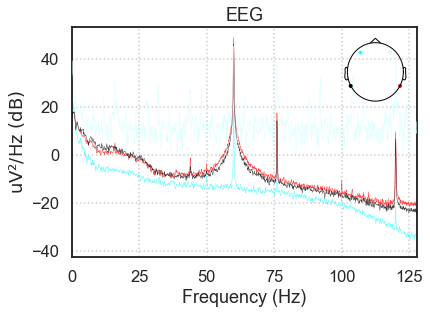

In [95]:
%matplotlib inline
raw.plot_psd();

### Filtering

Most ERP components are composed of lower frequency fluctuations in the EEG signal. Thus, we can filter out all frequencies between 1 and 30 hz in order to increase our ability to detect them.

Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 1 - 30 Hz
Using filter length: 15216

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


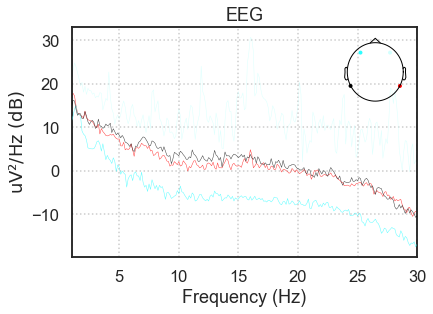

In [96]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

### Epoching

In [38]:
find_events??

In [46]:
raw.ch_names

['TP9', 'AF7', 'AF8', 'TP10', 'Stim']

In [ ]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw,stim_channel='1')
event_id = {'Standard': 0, 'Deviant': 1}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True, 
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

In [97]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'Standard': 2, 'Deviant': 1}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True, 
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

696 events found
Event IDs: [1 2]
sample drop %:  14.942528735632187


<Epochs  |   592 events (all good), -0.101562 - 0.800781 sec, baseline off, ~4.2 MB, data loaded,
 'Deviant': 79
 'Standard': 513>

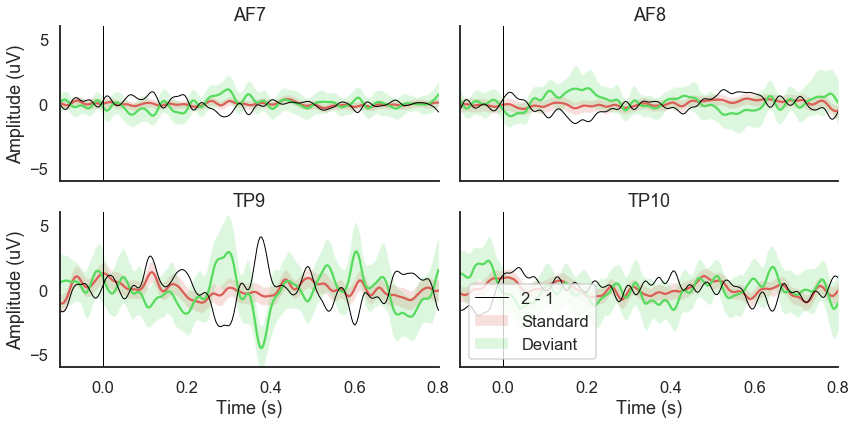

In [98]:
%matplotlib inline
conditions = OrderedDict()
conditions['Standard'] = [2]
conditions['Deviant'] = [1]

fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2))

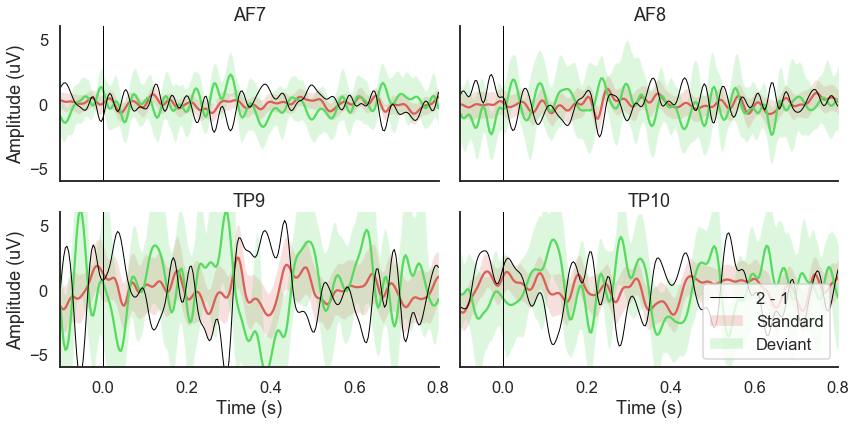

In [110]:
%matplotlib inline
conditions = OrderedDict()
conditions['Standard'] = [2]
conditions['Deviant'] = [1]

fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2))

In [117]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'Standard': 2, 'Deviant': 1}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True, 
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

1205 events found
Event IDs: [1 2]
sample drop %:  11.701244813278011


<Epochs  |   1064 events (all good), -0.101562 - 0.800781 sec, baseline off, ~7.5 MB, data loaded,
 'Deviant': 149
 'Standard': 915>

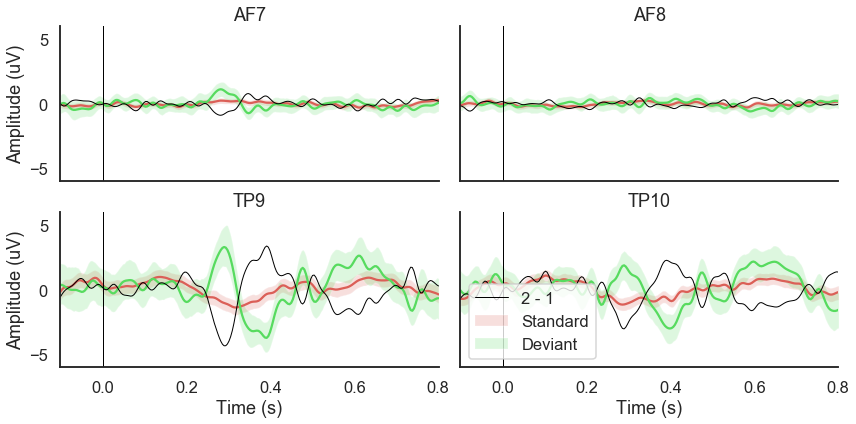

In [118]:
%matplotlib inline
conditions = OrderedDict()
conditions['Standard'] = [2]
conditions['Deviant'] = [1]

fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2))

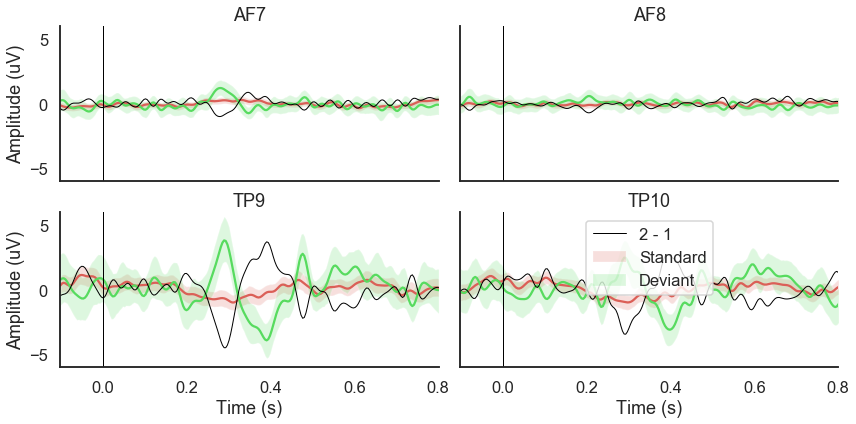

In [97]:
%matplotlib inline
conditions = OrderedDict()
conditions['Standard'] = [2]
conditions['Deviant'] = [1]

fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2))

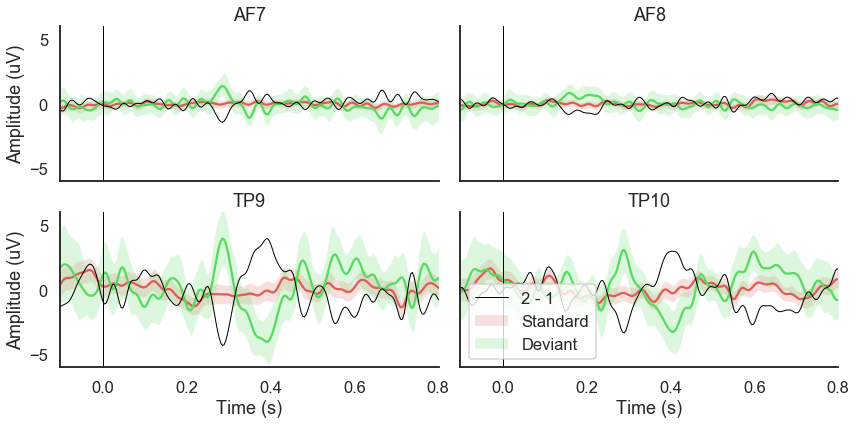

In [78]:
%matplotlib inline
conditions = OrderedDict()
conditions['Standard'] = [2]
conditions['Deviant'] = [1]

fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2))